In [1]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test,y_test)= mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


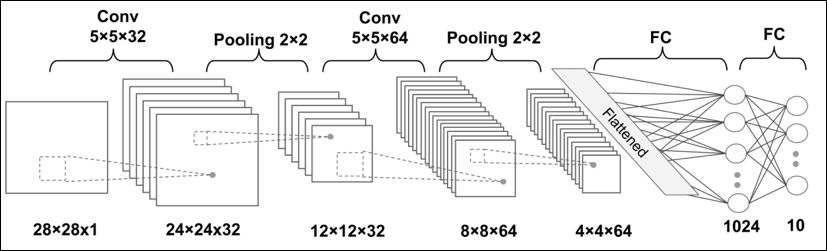

In [4]:
num_classes=10
epochs=3

X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0 #0 to 1
X_test/=255.0
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [8]:
cnn=Sequential()
cnn.add(Conv2D(32,kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)             

In [22]:
# cnn.load_weights('weights/cnn-model5.h5')
history=cnn.fit(X_train,y_train,verbose=1,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 70s 94ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0526 - val_accuracy: 0.9915
Epoch 2/10
750/750 [==============================] - 70s 94ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0518 - val_accuracy: 0.9916
Epoch 3/10
750/750 [==============================] - 70s 94ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0653 - val_accuracy: 0.9910
Epoch 4/10
750/750 [==============================] - 58s 78ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0452 - val_accuracy: 0.9919
Epoch 5/10
750/750 [==============================] - 58s 77ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0518 - val_accuracy: 0.9912
Epoch 6/10
750/750 [==============================] - 57s 76ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0550 - val_accuracy: 0.9918
Epoch 7/10
750/750 [==============================] - 57s 76ms/step - loss: 6.4524e-04 - accuracy: 0.9998 - val_loss: 0.0590 - val_accur

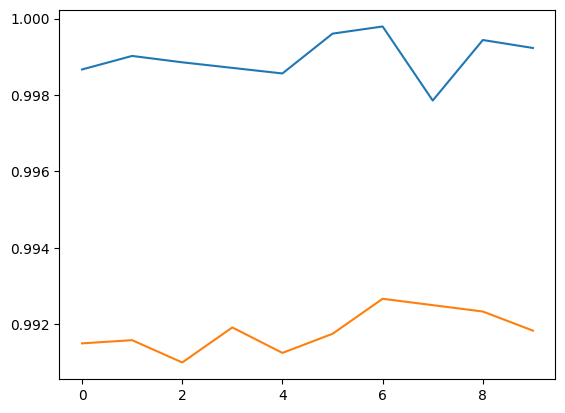

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0478 - accuracy: 0.9918


[0.04784611985087395, 0.9918000102043152]

In [25]:
cnn.save("mnist-conv")

INFO:tensorflow:Assets written to: mnist-conv\assets


INFO:tensorflow:Assets written to: mnist-conv\assets
